Input the ROI and get the plot of it.

In [7]:
import os
import csv
import tifffile
import scipy.io
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from skimage import filters,measure
from skimage.filters import threshold_local

In [8]:
path = r'/Volumes/Tianxiao/Spinning_Disk/Buffer_treated/'
root = r'intensity_variations.csv'
frames = 500
threshold = 20
df_all_events = pd.read_csv(path+root)
# Input numbers separated by spaces and convert to a list of integers
ROI_list = [int(x) for x in input("Enter numbers separated by ',': ").split(',')]
print("The ROIs are:", ROI_list)


The ROIs are: [12, 13]


In [26]:
'''header = ['ROI', 'Threshold', 'Number of Events', 'Maximum', 'Minimum']

file_exists = os.path.isfile(path + 'Manual_selected_ROI_events.csv')

for i in ROI_list:
    # Convert i to integer index (1-based to 0-based adjustment)
    index = int(i) - 1
    
    # Extract data from df_all_events
    row_data = df_all_events.iloc[index]
    
    # Calculate metrics
    count = np.sum(row_data > threshold)
    max_value = np.max(row_data)
    min_value = np.min(row_data)
    
    # Open the CSV file and write the data
    with open(path + 'Manual_selected_ROI_events.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        
        # Write the header only if the file does not exist
        if not file_exists:
            writer.writerow(header)
        
        # Prepare and write the row data
        row1 = [i,  # ROI as integer or float, based on your preference
                threshold,  # Assuming threshold is already float
                count,  # Count as integer
                max_value,  # Maximum value
                min_value]  # Minimum value
        
        writer.writerow(row1)'''

In [27]:
file_exists = os.path.isfile(path+'Manual_selected_ROI_events.csv')
header = ['ROI', 'Threshold', 'Number of Events', 'Maximum', 'Minimum']
# Open the CSV file and write data
with open(path+'Manual_selected_ROI_events.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header only if the file does not exist
    if not file_exists:
        writer.writerow(header)
    
    # Write data rows
    for i in ROI_list:
        index = int(i) - 1
        row_data = df_all_events.iloc[index]
        count = np.sum(row_data > threshold)
        max_value = np.max(row_data)
        min_value = np.min(row_data)
        row = [i, threshold, count, max_value, min_value]
        writer.writerow(row)

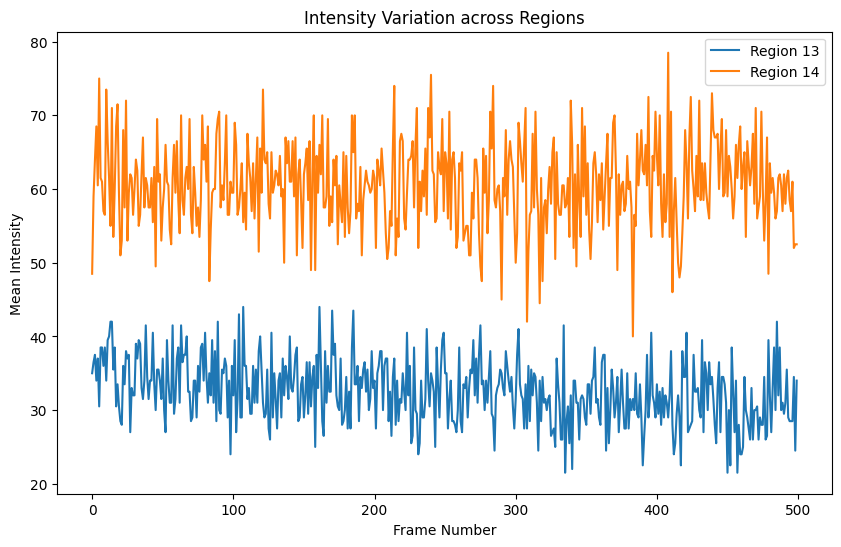

In [11]:
x_axis = np.arange(0,frames)
size = len(ROI_list)
if size == 0:
    print('No ROI found')
if size <11: 
    plt.figure(figsize=(10, 6))
    for i in ROI_list: 
        plt.plot(x_axis, df_all_events.iloc[i],label=f'Region {i+1}')
    plt.xlabel('Frame Number')
    # plt.xticks(ticks=x_axis, step=100)
    plt.ylabel('Mean Intensity')
    plt.title('Intensity Variation across Regions')
    plt.legend()
    plt.savefig(path+'Manual_selected_ROI_intensity_variation.pdf')
    plt.show()
else:
    for i in range(0, size, 10):
        plt.figure(figsize=(10, 6))
        for j in range(i, min(i+10, size)):
            plt.plot(x_axis, df_all_events.iloc[ROI_list[j]], label=f'Region {ROI_list[j]+1}')
        plt.xlabel('Frame Number')
        # plt.xticks(x_axis, step=100)
        plt.ylabel('Mean Intensity')
        plt.title('Intensity Variation across Regions')
        plt.legend()
        plt.savefig(path+f'Manual_selectedROI_intensity_variation_{i}.pdf')
        plt.show()